# Draw segmentation from osmFISH paper

- Author: Jeongbin Park
- osmFISH paper: Codeluppi *et al*. *Nature Methods* **15**, 932–935 (2018), https://www.nature.com/articles/s41592-018-0175-z
- data source: http://linnarssonlab.org/osmFISH/availability/

In [1]:
!wget https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/osmFISH/data/polyT_seg.pkl

--2020-05-01 15:49:24--  https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/osmFISH/data/polyT_seg.pkl
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:825::2010, 216.58.207.80
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:825::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1461350426 (1,4G) [application/octet-stream]
Saving to: ‘polyT_seg.pkl’

polyT_seg.pkl       100%[===================>]   1,36G  10,1MB/s    in 2m 29s  

2020-05-01 15:51:54 (9,33 MB/s) - ‘polyT_seg.pkl’ saved [1461350426/1461350426]



In [10]:
!wget http://linnarssonlab.org/osmFISH/osmFISH_SScortex_mouse_all_cells.loom

--2020-05-01 15:56:48--  http://linnarssonlab.org/osmFISH/osmFISH_SScortex_mouse_all_cells.loom
Resolving linnarssonlab.org (linnarssonlab.org)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to linnarssonlab.org (linnarssonlab.org)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1120947 (1,1M) [application/octet-stream]
Saving to: ‘osmFISH_SScortex_mouse_all_cells.loom’

osmFISH_SScortex_mo 100%[===================>]   1,07M  6,72MB/s    in 0,2s    

2020-05-01 15:56:48 (6,72 MB/s) - ‘osmFISH_SScortex_mouse_all_cells.loom’ saved [1120947/1120947]



In [29]:
import pickle
import loompy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_scalebar.scalebar import ScaleBar

In [14]:
osmfish_loom = loompy.connect("osmFISH_SScortex_mouse_all_cells.loom")

In [4]:
with open("polyT_seg.pkl", "rb") as f:
    seg_dic = pickle.load(f)

In [19]:
osmfish_ref_colors = {
    "Inhibitory CP": "#9b067d",
    "Inhibitory Crhbp": "#9805cc",
    "Inhibitory Cnr1": "#ca4479",
    "Inhibitory IC": "#ff49b0",
    "Inhibitory Kcnip2": "#af7efe",
    "Inhibitory Pthlh": "#4e14a6",
    "Inhibitory Vip": "#7759a4",
    "Pyramidal Cpne5": "#3e4198",
    "Pyramidal L2-3": "#0ab4e4",
    "Pyramidal L2-3 L5": "#1e6a87",
    "Pyramidal Kcnip2": "#6787d6",
    "Pyramidal L3-4": "#004dba",
    "pyramidal L4": "#78edff",
    "Pyramidal L5": "#0a9fb4",
    "Pyramidal L6": "#027fd0",
    "Hippocampus": "#004b71",
    "Astrocyte Gfap": "#de4726",
    "Astrocyte Mfge8": "#f69149",
    "Oligodendrocyte Precursor cells": "#b3ee3d",
    "Oligodendrocyte COP": "#5dd73d",
    "Oligodendrocyte NF": "#64a44e",
    "Oligodendrocyte MF": "#2f7449",
    "Oligodendrocyte Mature": "#285528",
    "Perivascular Macrophages": "#762a14",
    "Microglia": "#a7623d",
    "C. Plexus": "#21b183",
    "Ependymal": "#fadf0b",
    "Pericytes": "#f8c495",
    "Endothelial": "#f81919",
    "Endothelial 1": "#f05556",
    "Vascular Smooth Muscle": "#aec470",
}

In [17]:
seg_clusternames = list(np.unique(osmfish_loom.col_attrs["ClusterName"]))
col_dic = dict(zip(osmfish_loom.col_attrs['CellID'], [osmfish_ref_colors.get(e, None) for e in osmfish_loom.col_attrs["ClusterName"]]))
clid_dic = dict(zip(osmfish_loom.col_attrs['CellID'], [seg_clusternames.index(e) for e in osmfish_loom.col_attrs["ClusterName"]]))

In [23]:
from matplotlib.colors import to_rgba

width_cutoff = 1640 # um
height = 3380
pixel_per_um = 15.3846 # from BioRxiv paper

seg_img = np.zeros([width_cutoff, height, 4])
seg_img[..., 3] = 1 # background color to black
seg_ctmap = np.zeros([width_cutoff, height], dtype=int)
for cell_id, seg_coords in seg_dic.items():
    if col_dic[cell_id] is None:
        continue
    seg_coords_small = (seg_coords / pixel_per_um).astype(int)
    seg_col = to_rgba(col_dic[cell_id])
    seg_ctmap[seg_coords_small[:, 0], seg_coords_small[:, 1]] = clid_dic[cell_id]
    seg_img[seg_coords_small[:, 0], seg_coords_small[:, 1]] = seg_col

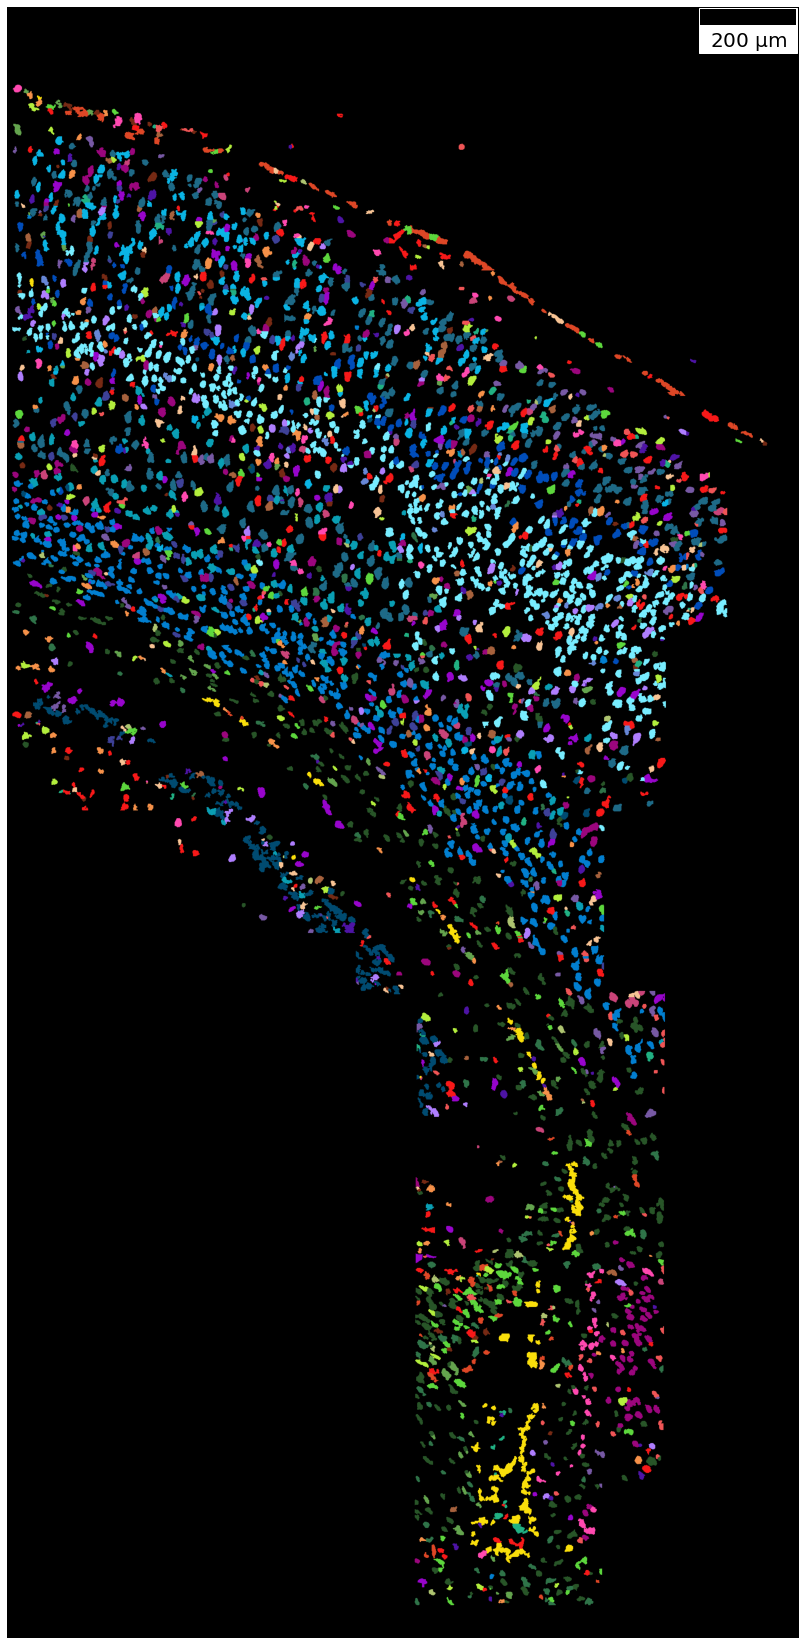

In [37]:
plt.figure(figsize=[20, 30])
plt.imshow(seg_img.swapaxes(0, 1))
plt.xlim([width_cutoff, 0])
scalebar = ScaleBar(1, 'um', pad=0.1, font_properties={"size": 20})
plt.gca().add_artist(scalebar)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
sns.despine(top=True, bottom=True, left=True, right=True) # remove boundary
pass